<a href="https://colab.research.google.com/github/freison/DeepLearning/blob/master/Part1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 2: Computer Vision

## Part 1: MNIST Digit Classification

In [3]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar

# Download the class repository
! git clone https://github.com/aamini/introtodeeplearning_labs.git  > /dev/null 2>&1
% cd introtodeeplearning_labs 
! git pull
% cd ..

# Import the necessary class-specific utility files for this lab
import introtodeeplearning_labs as util

/content/introtodeeplearning_labs
Already up to date.
/content


In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis = -1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis = -1)/255.
test_labels = np.int64(test_labels)

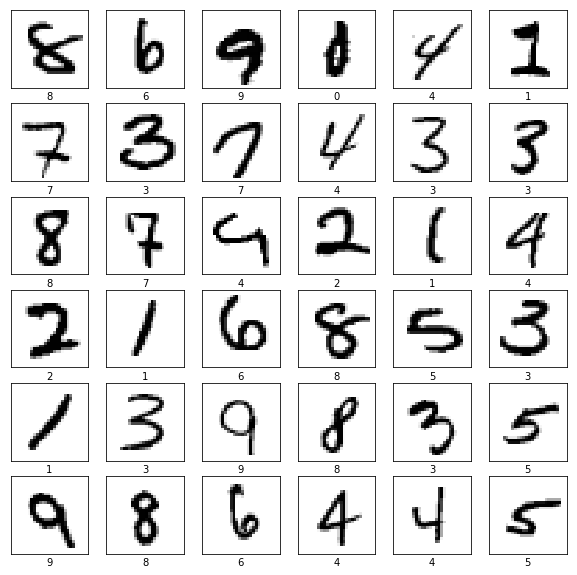

In [15]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [0]:
# Fully connected neural network architecture
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      # '''TODO: Define the activation function for the first fully connected layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu), # TODO (activation)
      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) # TODO (both dimension and activation)
  ])
  return fc_model

model = build_fc_model()

In [0]:
'''TODO: Experiment with different optimizer and learning rates. How do these affect
   the accurarcy of the trained model? Which optimizer and/or learning rates yield
   the best performace'''
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer ='adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])


# Train the model
We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training. With the Keras API and defining the model settings in the compile step, training is all accomplished by calling the fit method on an instance of the Model class.

In [0]:
# Define the batch size and the number of epoch to use during training
BATCH_SIZE = 64
EPOCHS = 8

In [22]:
#model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCH)
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/8
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2190 - acc: 0.9391
Epoch 2/8
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2107 - acc: 0.9416
Epoch 3/8
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2030 - acc: 0.9436
Epoch 4/8
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1959 - acc: 0.9455
Epoch 5/8
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1893 - acc: 0.9474
Epoch 6/8
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1831 - acc: 0.9495
Epoch 7/8
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1773 - acc: 0.9503
Epoch 8/8
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1719 - acc: 0.9518


In [23]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels) #TODO

print("Test accuracy:", test_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.1694 - acc: 0.9501
('Test accuracy:', 0.9501)


In [26]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      
      tf.keras.layers.Conv2D(filters = 24, kernel_size = (3,3), input_shape=(28,28,1), activation = tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size = (2,2)),
      
      # Define the second convolutional layer
      tf.keras.layers.Conv2D(filters = 36, kernel_size = (3,3), activation = tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size = (2,2)),
      
      # Define the flatten layer
      tf.keras.layers.Flatten(),
      # Define the first hidden layer fully connected
      tf.keras.layers.Dense(128, activation = tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.relu)
  ])
  return cnn_model

cnn_model = build_cnn_model()
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para